In [1]:
from sympy import *
from sympy.physics.mechanics import *
mechanics_printing()

In [25]:
q0, q1, q2, q3  = dynamicsymbols('q_0 q_1 q_2 q_3')
u1, u2, u3 ,u4 ,u5, u6  = dynamicsymbols('v_x v_y v_z omega_x omega_y omega_z')
q0d, q1d, q2d, q3d = dynamicsymbols('q_0 q_1 q_2 q_3', 1)
u1d, u2d, u3d, u4d, u5d, u6d = dynamicsymbols('v_x v_y v_z omega_x omega_y omega_z', 1)
m, Ixx, Iyy, Izz, Ixy, Iyz, Izx = symbols('m I_{xx} I_{yy} I_{zz} I_{xy} I_{yz} I_{zx}')
Fx, Fy, Fz, Mx, My, Mz = symbols('F_x F_y F_z M_x M_y M_z')

In [47]:
N = ReferenceFrame('N') 
B = N.orientnew('B', 'Quaternion', [q0, q1, q2, q3])
omega_qd = B.ang_vel_in(N)
B.set_ang_vel(N,u4*B.x + u5*B.y + u6*B.z)
kd_bod = [dot(B.ang_vel_in(N) - omega_qd, ijk) for ijk in B] + [q0*q0d+q1*q1d+q2*q2d+q3*q3d]

In [39]:
O = Point('O')
O.set_vel(N,0)

In [57]:
CM = Point('CM')
CM.set_vel(B,0)
CM.set_vel(N,u1*N.x + u2*N.y + u3*N.z)

In [63]:
#I = inertia(B, Ixx, Iyy, Izz, Ixy, Iyz, Izx)
I = inertia(B, Ixx, Iyy, Izz, 0, 0, 0)

In [64]:
ForceList = [(CM, Fx*N.x + Fy*N.y + Fz*N.z), (B, Mx*B.x + My*B.y + Mz*B.z)]
Body = RigidBody('Body', CM, B, m, (I, CM))
BodyList = [Body]

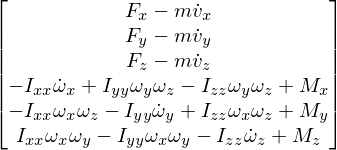

In [65]:
KM = KanesMethod(N, q_ind=[q0, q1, q2, q3], u_ind=[u1, u2, u3, u4, u5, u6], kd_eqs=kd_bod)
(fr, frstar) = KM.kanes_equations(ForceList, BodyList)
EOM = fr+frstar
#Am, Bm, u = KM.linearize(new_method=True)
EOM

In [66]:
f = open('eom.tex','w')
f.write(vlatex(EOM))
f.close()

In [48]:
kd_bod

In [23]:
help(ReferenceFrame.orientnew)

Help on function orientnew in module sympy.physics.vector.frame:

orientnew(self, newname, rot_type, amounts, rot_order='', variables=None, indices=None, latexs=None)
    Creates a new ReferenceFrame oriented with respect to this Frame.
    
    See ReferenceFrame.orient() for acceptable rotation types, amounts,
    and orders. Parent is going to be self.
    
    Parameters
    
    newname : str
        The name for the new ReferenceFrame
    rot_type : str
        The type of orientation matrix that is being created.
    amounts : list OR value
        The quantities that the orientation matrix will be defined by.
    rot_order : str
        If applicable, the order of a series of rotations.
    
    
    Examples
    
    >>> from sympy.physics.vector import ReferenceFrame, Vector
    >>> from sympy import symbols
    >>> q1 = symbols('q1')
    >>> N = ReferenceFrame('N')
    >>> A = N.orientnew('A', 'Axis', [q1, N.x])
    
    
    .orient() documentation:
    
    
    Defines th

In [46]:
help(KanesMethod)

Help on class KanesMethod in module sympy.physics.mechanics.kane:

class KanesMethod(builtins.object)
 |  Kane's method object.
 |  
 |  This object is used to do the "book-keeping" as you go through and form
 |  equations of motion in the way Kane presents in:
 |  Kane, T., Levinson, D. Dynamics Theory and Applications. 1985 McGraw-Hill
 |  
 |  The attributes are for equations in the form [M] udot = forcing.
 |  
 |  Attributes
 |  ==========
 |  
 |  q, u : Matrix
 |      Matrices of the generalized coordinates and speeds
 |  bodylist : iterable
 |      Iterable of Point and RigidBody objects in the system.
 |  forcelist : iterable
 |      Iterable of (Point, vector) or (ReferenceFrame, vector) tuples
 |      describing the forces on the system.
 |  auxiliary : Matrix
 |      If applicable, the set of auxiliary Kane's
 |      equations used to solve for non-contributing
 |      forces.
 |  mass_matrix : Matrix
 |      The system's mass matrix
 |  forcing : Matrix
 |      The system'